# Data Sampling
An introduction to deterministic and probabilistic sampling.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
#warnings.filterwarnings('ignore')

import sys
sys.path.append('tools/')

import numpy as np
import pandas as pd

# Graphing Libraries
import matplotlib.pyplot as pyplt
import seaborn as sns
sns.set_style("white")  

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

from IPython.display import display

To get our feet wet, let's take a look at the city of San Francisco's bike sharing data

In [3]:
trips = pd.read_csv('data/trip.csv')
commute = trips.where(trips.Duration < 1800)

In [4]:
display(trips.head())
display(commute.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460.0,765.0,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50.0,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70.0,288.0,Subscriber,2139
1,913459.0,1036.0,8/31/2015 23:11,San Antonio Shopping Center,31.0,8/31/2015 23:28,Mountain View City Hall,27.0,35.0,Subscriber,95032
2,913455.0,307.0,8/31/2015 23:13,Post at Kearny,47.0,8/31/2015 23:18,2nd at South Park,64.0,468.0,Subscriber,94107
3,913454.0,409.0,8/31/2015 23:10,San Jose City Hall,10.0,8/31/2015 23:17,San Salvador at 1st,8.0,68.0,Subscriber,95113
4,913453.0,789.0,8/31/2015 23:09,Embarcadero at Folsom,51.0,8/31/2015 23:22,Embarcadero at Sansome,60.0,487.0,Customer,9069


For this analysis, we are limiting ourselves to bike sharing trips that are leess that 30 minutes, because that is what comes free as part of the bike sharing program for the city of San Francisco.
We want to draw a histogram of the duration to understand exactly how long trips typically take. 

To do that, I am going to start off making bins of the data. For example, restricting the sampling to every minutes.

In [5]:
half_hour = 30 * 60 # 30 minutes times 60 seconds
bins = np.arange(1, half_hour+1, 60)

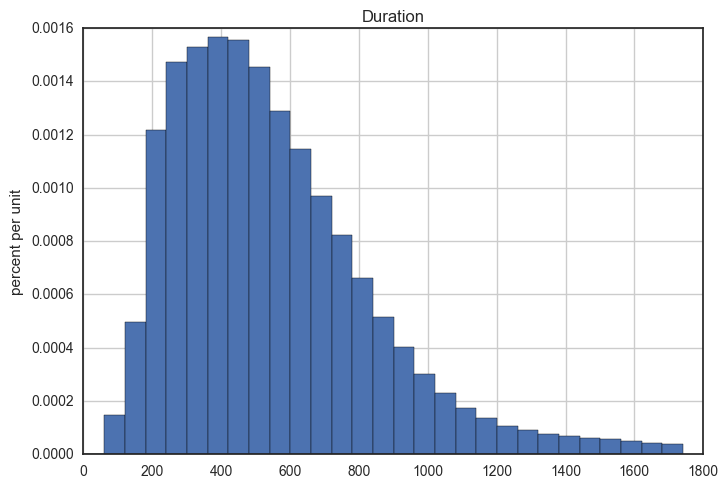

In [6]:
commute.hist('Duration', bins=bins, normed=True)
pyplt.ylabel('percent per unit');

In [7]:
def bin_frequency(k):
    bins = np.arange(1, half_hour+1, k)
    commute.hist('Duration', bins=bins, normed=True)

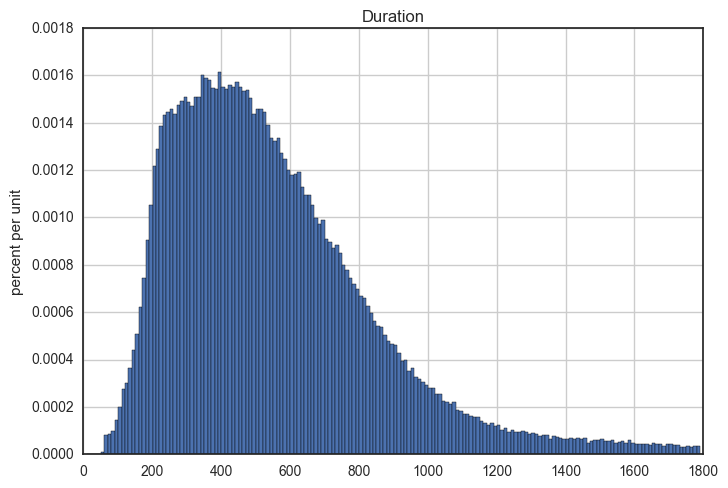

In [8]:
bin_frequency(10)
pyplt.ylabel('percent per unit');

In [9]:
weather = pd.read_csv('data/weather.csv')
sf = weather.where(weather.Zip == 94107)

In [10]:
sf = sf[[0, 1, 3]]
sf.columns = [u'PDT', 'High', 'Low']

In [11]:
sf.head()

,PDT,High,Low
0,9/1/2014,83.0,57.0
1,9/2/2014,72.0,60.0
2,9/3/2014,76.0,61.0
3,9/4/2014,74.0,61.0
4,9/5/2014,72.0,60.0


In [12]:
def axis_tick_frequency(ax, axis, freq):
    """The frequency of the y axis tick marks
        Attributes
        ----------
        ax: matplotlib axis object
        axis: char eithher 'y' or 'x'
        freq: int, the integer value of which the range moves
    """
    
    if axis == 'y':
        start, end = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(start, end, freq))
    elif axis == 'x':
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, freq))
    else:
        raise ValueError('{argument} is not a valid axis object'.format(argument=repr(axis)))

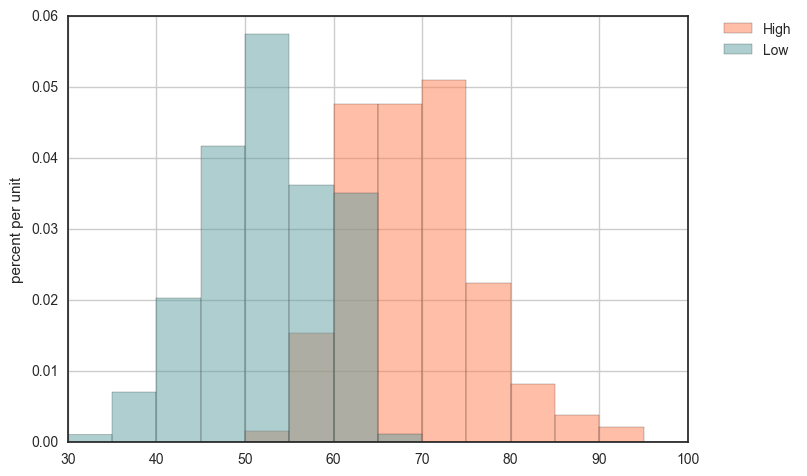

In [13]:
ax = sf[[1,2]].plot.hist(color =['coral','cadetblue'], bins=np.arange(30, 101, 5), normed=True, alpha = 0.5)
#axis_tick_frequency(ax, 'y', 10)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplt.grid(True);

#### Question:
 - What proportion of days had a low temp greater than 45 degrees?
 
#### Answer:



In [14]:
sf.where(sf.Low >= 45).Low.count() / 365 * 100

85.753424657534254

#### Question:
 - Figure out the distribution of the days of the year where temperature swings betweens the highs and the lows.

#### Answer:

In [15]:
sf['diff'] = sf.High - sf.Low

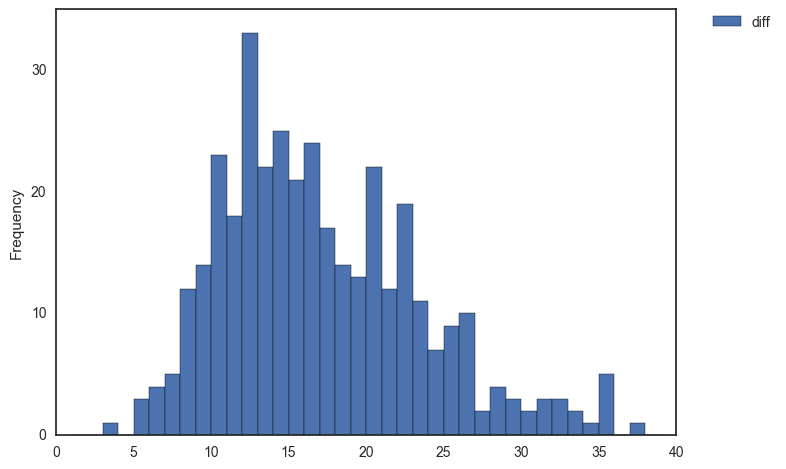

In [16]:
ax = sf['diff'].plot.hist(bins=np.arange(0, 40, 1))
axis_tick_frequency(ax, 'y', 10)
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


## Deterministic Sampling

In [17]:
top = pd.read_csv('data/top_movies.csv')

In [18]:
top.head()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


Let's make a deterministic sample. We will sample every 20th top grossing movie

In [19]:
interval = 20
sample = arange(0, len(top), interval)

In [20]:
df = pd.DataFrame()
for i in sample:
    df = df.append(top.ix[i, :])

In [21]:
df

,Gross,Gross (Adjusted),Studio,Title,Year
0,906723418.0,9.067234e+08,Buena Vista (Disney),Star Wars: The Force Awakens,2015.0
20,402111870.0,4.689381e+08,Paramount/Dreamworks,Transformers: Revenge of the Fallen,2009.0
40,322719944.0,4.080906e+08,Paramount/Dreamworks,Shrek the Third,2007.0
60,291710957.0,3.930331e+08,Buena Vista (Disney),"The Chronicles of Narnia: The Lion, the Witch ...",2005.0
80,242829261.0,3.503507e+08,Universal,Bruce Almighty,2003.0
100,198676459.0,1.757788e+09,MGM,Gone with the Wind,1939.0
120,167780960.0,3.628229e+08,Buena Vista (Disney),Three Men and a Baby,1987.0
140,125049125.0,3.698653e+08,UA,Rocky III,1982.0
160,94213184.0,3.532612e+08,Paramount,Saturday Night Fever,1977.0
180,52223306.0,3.483432e+08,Columbia,Funny Girl,1968.0


## Probability Sampling

A *population* is the set of all elements from whom a sample will be drawn. A *probability sample* is one for which it is possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample. In a probability sample, all elements need not have the same chance of being chosen.

Now let's do probabilistic sampling of the top movies. When we do a probabilistic sample like this, we call it a **"systematic sample."**


In [22]:
start = np.random.choice(np.arange(interval))
sample = np.arange(start, len(top), interval)

df = pd.DataFrame()
for i in sample:
    df = df.append(top.ix[i, :])

In [23]:
df

,Gross,Gross (Adjusted),Studio,Title,Year
0,906723418.0,9.067234e+08,Buena Vista (Disney),Star Wars: The Force Awakens,2015.0
20,402111870.0,4.689381e+08,Paramount/Dreamworks,Transformers: Revenge of the Fallen,2009.0
40,322719944.0,4.080906e+08,Paramount/Dreamworks,Shrek the Third,2007.0
60,291710957.0,3.930331e+08,Buena Vista (Disney),"The Chronicles of Narnia: The Lion, the Witch ...",2005.0
80,242829261.0,3.503507e+08,Universal,Bruce Almighty,2003.0
100,198676459.0,1.757788e+09,MGM,Gone with the Wind,1939.0
120,167780960.0,3.628229e+08,Buena Vista (Disney),Three Men and a Baby,1987.0
140,125049125.0,3.698653e+08,UA,Rocky III,1982.0
160,94213184.0,3.532612e+08,Paramount,Saturday Night Fever,1977.0
180,52223306.0,3.483432e+08,Columbia,Funny Girl,1968.0


#### Question:
- What is the probability that the *Rush Hour 2* ends up in the sample we have systematically chosen?

#### Answer:
- This is depends solely on the the chance that the first movie chosen from the dataset is *The Dark Knight Rises* and that has a chance of 1 in 20, i.e., 5%. 


### Uniform Sample
A uniform sample is a sample drawn at random without replacements

In [24]:
def sample(num_sample, top, with_replacement=False):
    """
    Create a random sample from a table
    
    Attributes
    ---------
    num_sample: int
    top: dataframe
    with_replacement: boolean
    
    Returns a random subset of table index
    """
    df_index = []
    lst = np.arange(0, len(top), 1)

    for i in np.arange(0, num_sample, 1):

        # pick randomly from the whole table
        sample_index = np.random.choice(lst)

        if with_replacement:
            # store index
            df_index.append(sample_index)
        else:
            # remove the choice that was selected
            lst = np.setdiff1d(lst,[sample_index])
            df_index.append(sample_index)
            
    return df_index


In [25]:
index_ = sample(35, top, with_replacement=True)
df = top.ix[index_, :]
df.sort_values(by='Gross', ascending=0)

,Title,Studio,Gross,Gross (Adjusted),Year
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
7,Star Wars,Fox,460998007,1549640500,1977
12,The Hunger Games: Catching Fire,Lionsgate,424668047,444697400,2013
20,Transformers: Revenge of the Fallen,Paramount/Dreamworks,402111870,468938100,2009
24,Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005
25,The Lord of the Rings: The Return of the King,New Line,377845905,536265400,2003
25,The Lord of the Rings: The Return of the King,New Line,377845905,536265400,2003
26,Spider-Man 2,Sony,373585825,523381100,2004
26,Spider-Man 2,Sony,373585825,523381100,2004


In [26]:
index_ = sample(25, top)
df = top.ix[index_, :]
df.sort_values(by='Gross', ascending=0)

,Title,Studio,Gross,Gross (Adjusted),Year
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012
19,Jurassic Park,Universal,402453882,799721000,1993
35,Spider-Man 3,Sony,336530303,425554300,2007
39,Forrest Gump,Paramount,330252182,683929300,1994
42,Iron Man,Paramount,318412101,385808100,2008
45,The Lord of the Rings: The Fellowship of the Ring,New Line,315544750,476753700,2001
85,Cast Away,Fox,233632142,364479500,2000
105,Dances with Wolves,Orion,184208848,380183900,1990
115,Crocodile Dundee,Paramount,174803506,401961400,1986
121,Robin Hood: Prince of Thieves,Warner Bros.,165493908,341994500,1991


## Dice

In [27]:
die = pd.DataFrame()
die["Face"] = [1,2,3,4,5,6]

In [28]:
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


We can simulate the act of rolling dice by just pulling out rows

In [29]:
index_ = sample(3, die, with_replacement=True)
df = die.ix[index_, :]
df

,Face
3,4
4,5
4,5


### Probability Histogram



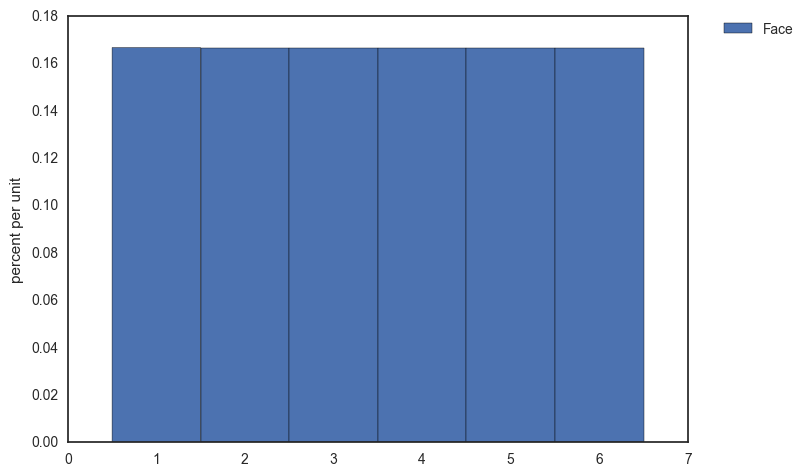

In [30]:
dice_bins = np.arange(0.5, 7, 1) 

# norm the histogram to give us the density scale
die.plot.hist(bins=dice_bins, normed=True)
pyplt.ylabel('percent per unit')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


In [96]:
def dice_hist(n):
    """Construct histogram of n simulated dice rolls
    
    Attributes
    -----------
    n: int 
    """
    
    if n > 0:
        dice_bins = np.arange(0.5, 7, 1) 
        index_ = sample(n, die, with_replacement=True)
        df = die.ix[index_, :]
        df.plot.hist(bins=dice_bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')

        
def dice_sum_hist(num_die, n):
    """
    Construct histogram of rolling a pair of dice and plot the sum of the faces
    
    Attributes
    -----------
    num_die: int (number of dice)
    n: int 
    """
    
    if n > 0:
        dice_bins = np.arange(0.5, 13, 1) 
        die_1_index = sample(n, die, with_replacement=True)
        die_2_index = sample(n, die, with_replacement=True)
        
        die_1_index = sample(n, die, with_replacement=True)
        die_2_index = sample(n, die, with_replacement=True)

        df_1 = die.ix[die_1_index, :]
        df_2 = die.ix[die_2_index, :]

        df_1.reset_index(inplace=True)
        df_2.reset_index(inplace=True)

        df = df_1.Face + df_2.Face
        df.plot.hist(bins=dice_bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')
        

def dice_prod_hist(num_die, n):
    """
    Construct histogram of rolling a pair of dice and plotting the product of the faces.
    
    Attributes
    -----------
    num_die: int (number of dice)
    n: int 
    """
    
    if n > 0:
        dice_bins = np.arange(0.5, 37, 1) 
        die_1_index = sample(n, die, with_replacement=True)
        die_2_index = sample(n, die, with_replacement=True)
        
        die_1_index = sample(n, die, with_replacement=True)
        die_2_index = sample(n, die, with_replacement=True)

        df_1 = die.ix[die_1_index, :]
        df_2 = die.ix[die_2_index, :]

        df_1.reset_index(inplace=True)
        df_2.reset_index(inplace=True)

        df = df_1.Face * df_2.Face
        df.plot.hist(bins=dice_bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')
        


### Probability Histogram

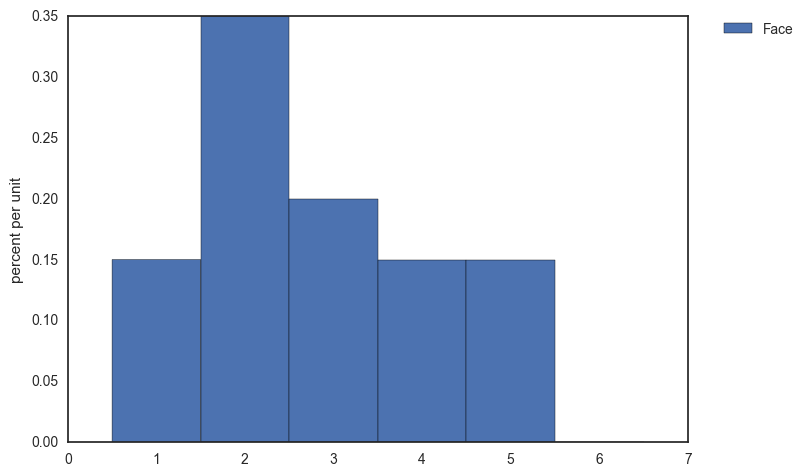

In [88]:
dice_hist(20)

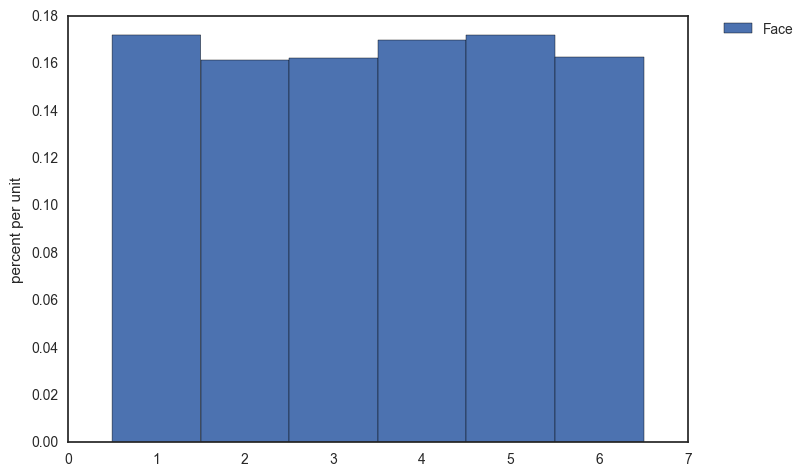

In [89]:
dice_hist(10000)

Plot the sum of dices

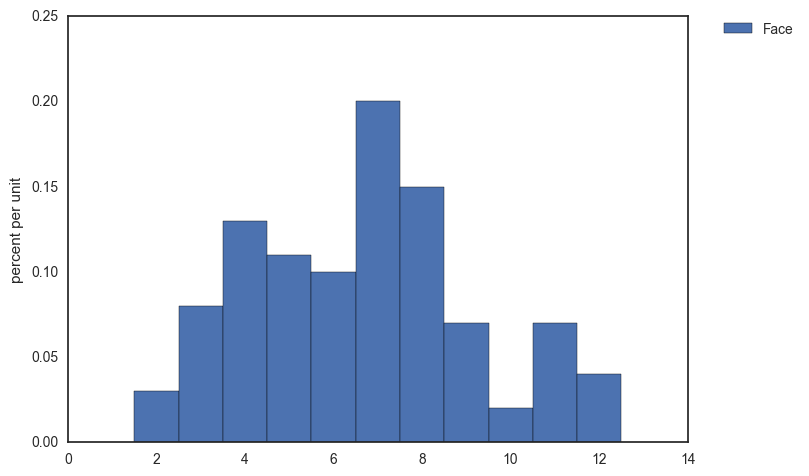

In [97]:
num_die = 2
n = 100
dice_sum_hist(num_die, n)

### Gaps in the histogram?
The graph below helps us see that the probability histograms can have gaps. The graph below plots the probability histogram of the product of a pair of dice. The smallest number is 1, while the largest number is 36. Because of the distribution of the die face, we can never get a 7, 11 and so on. 

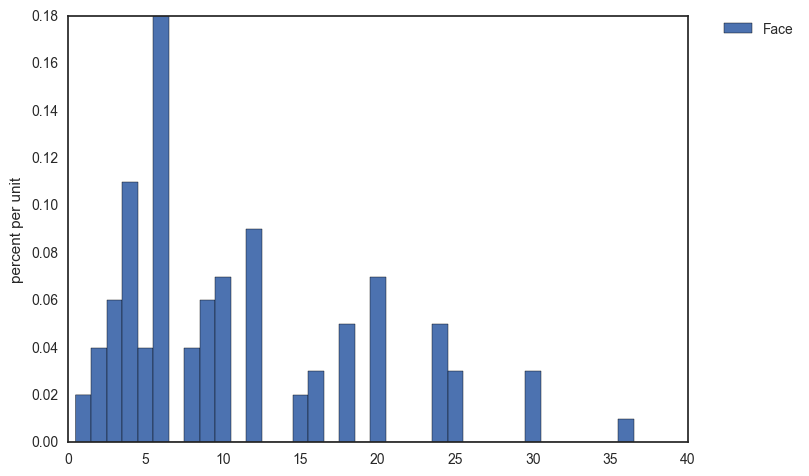

In [94]:
num_die = 2
n = 100
dice_prod_hist(num_die, n)